# 1. NIFI 다운로드 공식사이트

- https://nifi.apache.org/download.html

## 2. 압축 풀기

$ tar -xzvf 압축파일명

## 3. /etc/hosts파일 수정

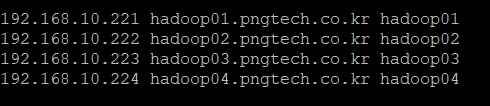

## 4. zookeeper.properties 파일 수정

### 이 파일의 위치는 nifi/conf 폴더안에 존재

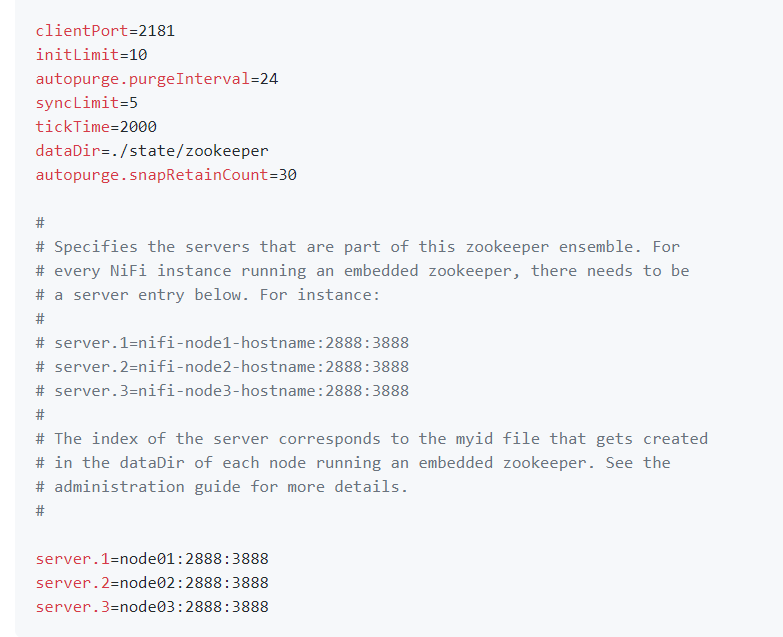

## 5. state-management.xml 파일 수정

In [ ]:
<cluster-provider>
        <id>zk-provider</id>
        <class>org.apache.nifi.controller.state.providers.zookeeper.ZooKeeperStateProvider</class>
        # 아래 부분을 수정 합니다.
        <property name="Connect String">node01:2181,node02:2181,node03:2181</property>
        <property name="Root Node">/nifi</property>
        <property name="Session Timeout">10 seconds</property>
        <property name="Access Control">Open</property>
</cluster-provider>
    ```

## 6. myid 설정  ( zookeeper 관련 )

1. nifi설치된 경로/state/zookeeper/myid
2. 각서버마다 myid값이 상이해야 하며 순서대로 1,2,3을 가지면 된다.

## 7. nifi.properties 수정

In [ ]:
####################
 # State Management #
 ####################
 nifi.state.management.configuration.file=./conf/state-management.xml
 # The ID of the local state provider
 nifi.state.management.provider.local=local-provider
 # The ID of the cluster-wide state provider. This will be ignored if NiFi is not clustered but must be populated if running in a cluster.
 nifi.state.management.provider.cluster=zk-provider
 # Specifies whether or not this instance of NiFi should run an embedded ZooKeeper server
 nifi.state.management.embedded.zookeeper.start=true # 이부분을 true로 바꿔준다.
 # Properties file that provides the ZooKeeper properties to use if <nifi.state.management.embedded.zookeeper.start> is set to true
 nifi.state.management.embedded.zookeeper.properties=./conf/zookeeper.properties

In [ ]:
# cluster node properties (only configure for cluster nodes) #
 nifi.cluster.is.node=true <-- true로 바꿔준다.
 nifi.cluster.node.address=kdn-slave02 <-- 서버이름을 설정한다.
 nifi.cluster.node.protocol.port=5882
 nifi.cluster.node.protocol.threads=10
 nifi.cluster.node.protocol.max.threads=50
 nifi.cluster.node.event.history.size=25
 nifi.cluster.node.connection.timeout=5 sec
 nifi.cluster.node.read.timeout=5 sec
 nifi.cluster.node.max.concurrent.requests=100
 nifi.cluster.firewall.file=
 nifi.cluster.flow.election.max.wait.time=1 mins
 nifi.cluster.flow.election.max.candidates=

In [ ]:
 # zookeeper properties, used for cluster management #
 nifi.zookeeper.connect.string=node01:2181,node02:2181,node03:2181 <-- 이부분을 설정해준다
 nifi.zookeeper.connect.timeout=3 secs
 nifi.zookeeper.session.timeout=3 secs
 nifi.zookeeper.root.node=/nifi

## 오류 발생시

1. 방화벽이 켜져있으면 끄고 실행 / 방화벽을 시작프로그램에서 제거
2. 포트번호 사용중인지 확인
3. nifi-app.log에서 에러로그확인 가능